
<a data-flickr-embed="true"  href="https://www.flickr.com/photos/157237655@N08/46469941062/in/datetaken-public/" title="example_object_detection_result"><img src="https://farm5.staticflickr.com/4910/46469941062_bf9c38bd62_b.jpg" width="997" height="1024" alt="example_object_detection_result"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

This is the sixth blog post of [Object Detection with YOLO blog series](https://fairyonice.github.io/tag/object-detection-using-yolov2-on-pascal-voc2012-series.html). This blog performs inference using the model in trained in [Part 5 Object Detection with Yolo using VOC 2012 data - training](https://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html).
I will use PASCAL VOC2012 data. 
This blog assumes that the readers have read the previous two blog posts - [Part 1](https://fairyonice.github.io/Part_1_Object_Detection_with_Yolo_for_VOC_2014_data_anchor_box_clustering.html), [Part 2](https://fairyonice.github.io/Part%202_Object_Detection_with_Yolo_using_VOC_2014_data_input_and_output_encoding.html), [Part 3](https://fairyonice.github.io/Part_3_Object_Detection_with_Yolo_using_VOC_2012_data_model.html), [Part 4](https://fairyonice.github.io/Part_4_Object_Detection_with_Yolo_using_VOC_2012_data_loss.html), [Part 5](https://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html).

## Andrew Ng's YOLO lecture
- [Neural Networks - Bounding Box Predictions](https://www.youtube.com/watch?v=gKreZOUi-O0&t=0s&index=7&list=PL_IHmaMAvkVxdDOBRg2CbcJBq9SY7ZUvs)
- [C4W3L06 Intersection Over Union](https://www.youtube.com/watch?v=ANIzQ5G-XPE&t=7s)
- [C4W3L07 Nonmax Suppression](https://www.youtube.com/watch?v=VAo84c1hQX8&t=192s)
- [C4W3L08 Anchor Boxes](https://www.youtube.com/watch?v=RTlwl2bv0Tg&t=28s)
- [C4W3L09 YOLO Algorithm](https://www.youtube.com/watch?v=9s_FpMpdYW8&t=34s)

## Reference
- [You Only Look Once:Unified, Real-Time Object Detection](https://arxiv.org/pdf/1506.02640.pdf) 

- [YOLO9000:Better, Faster, Stronger](https://arxiv.org/pdf/1612.08242.pdf)
 
- [experiencor/keras-yolo2](https://github.com/experiencor/keras-yolo2)

## Reference in my blog
- [Part 1 Object Detection using YOLOv2 on Pascal VOC2012 - anchor box clustering](https://fairyonice.github.io/Part_1_Object_Detection_with_Yolo_for_VOC_2014_data_anchor_box_clustering.html)
- [Part 2 Object Detection using YOLOv2 on Pascal VOC2012 - input and output encoding](https://fairyonice.github.io/Part%202_Object_Detection_with_Yolo_using_VOC_2014_data_input_and_output_encoding.html)
- [Part 3 Object Detection using YOLOv2 on Pascal VOC2012 - model](https://fairyonice.github.io/Part_3_Object_Detection_with_Yolo_using_VOC_2012_data_model.html)
- [Part 4 Object Detection using YOLOv2 on Pascal VOC2012 - loss](https://fairyonice.github.io/Part_4_Object_Detection_with_Yolo_using_VOC_2012_data_loss.html)
- [Part 5 Object Detection using YOLOv2 on Pascal VOC2012 - training](https://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html)
- [Part 6 Object Detection using YOLOv2 on Pascal VOC 2012 data - inference on image](https://fairyonice.github.io/Part_6_Object_Detection_with_Yolo_using_VOC_2012_data_inference_image.html)
- [Part 7 Object Detection using YOLOv2 on Pascal VOC 2012 data - inference on video](https://fairyonice.github.io/Part_6_Object_Detection_with_Yolo_using_VOC_2012_data_inference_video.html)

## My GitHub repository 
This repository contains all the ipython notebooks in this blog series and the funcitons (See backend.py). 
- [FairyOnIce/ObjectDetectionYolo](https://github.com/FairyOnIce/ObjectDetectionYolo)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys
print(sys.version)
%matplotlib inline

3.6.3 |Anaconda, Inc.| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


Read in the hyperparameters to define the YOLOv2 model used during training 

In [2]:
train_image_folder = "../ObjectDetectionRCNN/VOCdevkit/VOC2012/JPEGImages/"
train_annot_folder = "../ObjectDetectionRCNN/VOCdevkit/VOC2012/Annotations/"

LABELS = ['aeroplane',  'bicycle', 'bird',  'boat',      'bottle', 
          'bus',        'car',      'cat',  'chair',     'cow',
          'diningtable','dog',    'horse',  'motorbike', 'person',
          'pottedplant','sheep',  'sofa',   'train',   'tvmonitor']

ANCHORS = np.array([1.07709888,  1.78171903,  # anchor box 1, width , height
                    2.71054693,  5.12469308,  # anchor box 2, width,  height
                   10.47181473, 10.09646365,  # anchor box 3, width,  height
                    5.48531347,  8.11011331]) # anchor box 4, width,  height


BOX               = int(len(ANCHORS)/2)
TRUE_BOX_BUFFER   = 50
IMAGE_H, IMAGE_W  = 416, 416
GRID_H,  GRID_W   = 13 , 13

Load the weights trained in [Part 5](https://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html)

In [3]:
from backend import define_YOLOv2

CLASS             = len(LABELS)
model, _          = define_YOLOv2(IMAGE_H,IMAGE_W,GRID_H,GRID_W,TRUE_BOX_BUFFER,BOX,CLASS, 
                                  trainable=False)
model.load_weights("weights_yumi.h5")

/Users/yumikondo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Perform detection on sample image

### Encode the image using the ImageReader class 
ImageReader class was created in [Part 2](https://fairyonice.github.io/Part%202_Object_Detection_with_Yolo_using_VOC_2014_data_input_and_output_encoding.html).

In [4]:
## input encoding
from backend import ImageReader
imageReader = ImageReader(IMAGE_H,IMAGE_W=IMAGE_W, norm=lambda image : image / 255.)
out = imageReader.fit(train_image_folder + "/2007_005430.jpg")

### Predict the bounding box.

In [5]:
print(out.shape)
X_test = np.expand_dims(out,0)
print(X_test.shape)
# handle the hack input
dummy_array = np.zeros((1,1,1,1,TRUE_BOX_BUFFER,4))
y_pred = model.predict([X_test,dummy_array])
print(y_pred.shape)

(416, 416, 3)
(1, 416, 416, 3)
(1, 13, 13, 4, 25)


### Rescale the network output
Remind you that <code>y_pred</code> takes any real values. 
Therefore

In [6]:
class OutputRescaler(object):
    def __init__(self,ANCHORS):
        self.ANCHORS = ANCHORS

    def _sigmoid(self, x):
        return 1. / (1. + np.exp(-x))
    def _softmax(self, x, axis=-1, t=-100.):
        x = x - np.max(x)

        if np.min(x) < t:
            x = x/np.min(x)*t

        e_x = np.exp(x)
        return e_x / e_x.sum(axis, keepdims=True)
    def get_shifting_matrix(self,netout):
        
        GRID_H, GRID_W, BOX = netout.shape[:3]
        no = netout[...,0]
        
        ANCHORSw = self.ANCHORS[::2]
        ANCHORSh = self.ANCHORS[1::2]
       
        mat_GRID_W = np.zeros_like(no)
        for igrid_w in range(GRID_W):
            mat_GRID_W[:,igrid_w,:] = igrid_w

        mat_GRID_H = np.zeros_like(no)
        for igrid_h in range(GRID_H):
            mat_GRID_H[igrid_h,:,:] = igrid_h

        mat_ANCHOR_W = np.zeros_like(no)
        for ianchor in range(BOX):    
            mat_ANCHOR_W[:,:,ianchor] = ANCHORSw[ianchor]

        mat_ANCHOR_H = np.zeros_like(no) 
        for ianchor in range(BOX):    
            mat_ANCHOR_H[:,:,ianchor] = ANCHORSh[ianchor]
        return(mat_GRID_W,mat_GRID_H,mat_ANCHOR_W,mat_ANCHOR_H)

    def fit(self, netout):    
        '''
        netout  : np.array of shape (N grid h, N grid w, N anchor, 4 + 1 + N class)
        
        a single image output of model.predict()
        '''
        GRID_H, GRID_W, BOX = netout.shape[:3]
        
        (mat_GRID_W,
         mat_GRID_H,
         mat_ANCHOR_W,
         mat_ANCHOR_H) = self.get_shifting_matrix(netout)


        # bounding box parameters
        netout[..., 0]   = (self._sigmoid(netout[..., 0]) + mat_GRID_W)/GRID_W # x      unit: range between 0 and 1
        netout[..., 1]   = (self._sigmoid(netout[..., 1]) + mat_GRID_H)/GRID_H # y      unit: range between 0 and 1
        netout[..., 2]   = (np.exp(netout[..., 2]) + mat_ANCHOR_W)/GRID_W      # width  unit: range between 0 and 1
        netout[..., 3]   = (np.exp(netout[..., 3]) + mat_ANCHOR_H)/GRID_H      # height unit: range between 0 and 1
        # rescale the confidence to range 0 and 1 
        netout[..., 4]   = self._sigmoid(netout[..., 4])
        expand_conf      = np.expand_dims(netout[...,4],-1) # (N grid h , N grid w, N anchor , 1)
        # rescale the class probability to range between 0 and 1
        # Pr(object class = k) = Pr(object exists) * Pr(object class = k |object exists)
        #                      = Conf * P^c
        netout[..., 5:]  = expand_conf * self._softmax(netout[..., 5:])
        # ignore the class probability if it is less than obj_threshold 
    
        return(netout)

### Experiment <code>OutputRescaler</code>

In [7]:
netout         = y_pred[0]
outputRescaler = OutputRescaler(ANCHORS=ANCHORS)
netout_scale   = outputRescaler.fit(netout)

## Post processing the YOLOv2 object
YOLOv2 can potentially preoduce GRID_H x GRID_W x BOX many bounding box.
However, only few of them actually contain actual objects. 
Some bounding box may contain the same objects.
I will postprocess the predicted bounding box.  

In [8]:
from backend import BoundBox

    
def find_high_class_probability_bbox(netout_scale, obj_threshold):
    '''
    == Input == 
    netout : y_pred[i] np.array of shape (GRID_H, GRID_W, BOX, 4 + 1 + N class)
    
             x, w must be a unit of image width
             y, h must be a unit of image height
             c must be in between 0 and 1
             p^c must be in between 0 and 1
    == Output ==
    
    boxes  : list containing bounding box with Pr(object is in class C) > 0 for at least in one class C 
    
             
    '''
    GRID_H, GRID_W, BOX = netout_scale.shape[:3]
    
    boxes = []
    for row in range(GRID_H):
        for col in range(GRID_W):
            for b in range(BOX):
                # from 4th element onwards are confidence and class classes
                classes = netout_scale[row,col,b,5:]
                
                if np.sum(classes) > 0:
                    # first 4 elements are x, y, w, and h
                    x, y, w, h = netout_scale[row,col,b,:4]
                    confidence = netout_scale[row,col,b,4]
                    box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, confidence, classes)
                    if box.get_score() > obj_threshold:
                        boxes.append(box)
    return(boxes)


### Experiment <code>find_high_class_probability_bbox</code>

In [9]:
obj_threshold = 0.015
boxes_tiny_threshold = find_high_class_probability_bbox(netout_scale,obj_threshold)
print("obj_threshold={}".format(obj_threshold))
print("In total, YOLO can produce GRID_H * GRID_W * BOX = {} bounding boxes ".format( GRID_H * GRID_W * BOX))
print("I found {} bounding boxes with top class probability > {}".format(len(boxes_tiny_threshold),obj_threshold))

obj_threshold = 0.03
boxes = find_high_class_probability_bbox(netout_scale,obj_threshold)
print("\nobj_threshold={}".format(obj_threshold))
print("In total, YOLO can produce GRID_H * GRID_W * BOX = {} bounding boxes ".format( GRID_H * GRID_W * BOX))
print("I found {} bounding boxes with top class probability > {}".format(len(boxes),obj_threshold))

obj_threshold=0.015
In total, YOLO can produce GRID_H * GRID_W * BOX = 676 bounding boxes 
I found 96 bounding boxes with top class probability > 0.015

obj_threshold=0.03
In total, YOLO can produce GRID_H * GRID_W * BOX = 676 bounding boxes 
I found 2 bounding boxes with top class probability > 0.03


## Visualize many bounding box by having small obj_threshold value 
Most of the bounding boxes do not contain objects. 
This shows that we really need to reduce the number of bounding box.

Plot with low object threshold
person          0.015 xmin=  70,ymin=   1,xmax= 278,ymax= 294
person          0.027 xmin= 157,ymin=  45,xmax= 272,ymax= 249
person          0.036 xmin= 115,ymin=   5,xmax= 319,ymax= 298
person          0.017 xmin= 142,ymin=   8,xmax= 340,ymax= 302
person          0.016 xmin= 158,ymin=   2,xmax= 362,ymax= 297
bicycle         0.026 xmin=  85,ymin=  82,xmax= 208,ymax= 277
bicycle         0.020 xmin=   0,ymin=   0,xmax= 327,ymax= 351
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
person          0.021 xmin= 117,ymin=  25,xmax= 320,ymax= 319
person          0.023 xmin= 146,ymin=  20,xmax= 342,ymax= 317
person          0.024 xmin= 158,ymin=  20,xmax= 360,ymax= 316
bicycle         0.017 xmin=  58,ymin= 106,xmax= 178,ymax= 304
bicycle         0.023 xmin=   5,ymin=  63,xmax= 221,ymax= 348
bicycle         0.016 xmin=  85,ymin= 110,xmax= 217,ymax= 302
bicycle         0.021 xmin=  49,ymin=  69,xmax= 255,ymax= 350
bicycle         0.018 xmin=   6,ymin=  

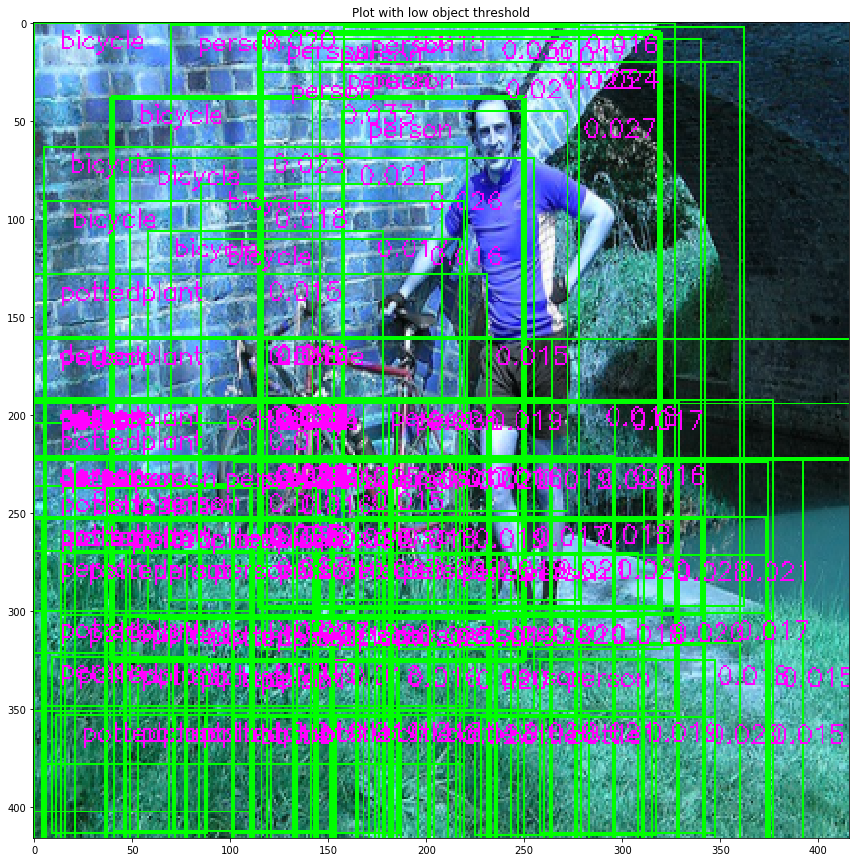

Plot with high object threshold
person          0.036 xmin= 115,ymin=   5,xmax= 319,ymax= 298
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325


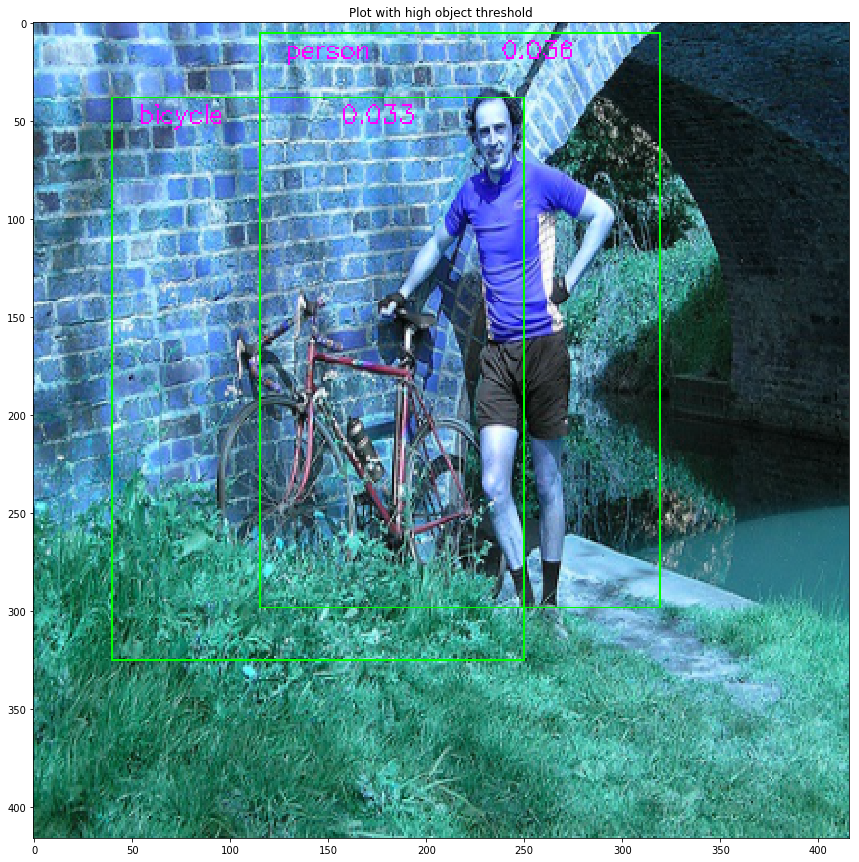

In [10]:
import cv2, copy
def draw_boxes(image, boxes, labels):
    '''
    image : np.array of shape (N height, N width, 3)
    '''
    def adjust_minmax(c,_max):
        if c < 0:
            c = 0   
        if c > _max:
            c = _max
        return c
    
    image = copy.deepcopy(image)
    image_h, image_w, _ = image.shape
    score_rescaled  = np.array([box.get_score() for box in boxes])
    score_rescaled /= np.min(score_rescaled)
    for sr, box in zip(score_rescaled,boxes):
        xmin = adjust_minmax(int(box.xmin*image_w),image_w)
        ymin = adjust_minmax(int(box.ymin*image_h),image_h)
        xmax = adjust_minmax(int(box.xmax*image_w),image_w)
        ymax = adjust_minmax(int(box.ymax*image_h),image_h)
 
        
        text = "{:15} {:4.3f}".format(labels[box.label], box.get_score())
        print("{} xmin={:4.0f},ymin={:4.0f},xmax={:4.0f},ymax={:4.0f}".format(text,xmin,ymin,xmax,ymax,text))
        cv2.rectangle(image, 
                      pt1=(xmin,ymin), 
                      pt2=(xmax,ymax), 
                      color=(0,1,0), 
                      thickness=sr)
        cv2.putText(img       = image, 
                    text      = text, 
                    org       = (xmin+ 13, ymin + 13),
                    fontFace  = cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale = 1e-3 * image_h,
                    color     = (1, 0, 1),
                    thickness = 1)
        
    return image


print("Plot with low object threshold")
ima = draw_boxes(X_test[0],boxes_tiny_threshold,LABELS)
figsize = (15,15)
plt.figure(figsize=figsize)
plt.imshow(ima[:,:,::-1]); 
plt.title("Plot with low object threshold")
plt.show()

print("Plot with high object threshold")
ima = draw_boxes(X_test[0],boxes,LABELS)
figsize = (15,15)
plt.figure(figsize=figsize)
plt.imshow(ima[:,:,::-1]); 
plt.title("Plot with high object threshold")
plt.show()

### Nonmax surpression
Nonmax surpression is a way to detect a single object only once. 
Andrew Ng has presented the idea of nonmax supression in his lecture very well: [C4W3L07 Nonmax Suppression](https://www.youtube.com/watch?v=VAo84c1hQX8&t=192s).

The following code implement the nonmax surpression algorithm. 
For each object class, the algorithm picks the most promissing bounding box, and then remove (or suppress) the remaining bounding box that contain high overwrap with the most promissing bounding box.
The most promissing or not is determined by the predicted class probaiblity.

In [11]:
from backend import BestAnchorBoxFinder
def nonmax_suppression(boxes,iou_threshold):
    '''
    boxes : list containing "good" BoundBox of a frame
            [BoundBox(),BoundBox(),...]
    '''
    bestAnchorBoxFinder    = BestAnchorBoxFinder([])
    
    CLASS    = len(boxes[0].classes)
    index_boxes = []   
    # suppress non-maximal boxes
    for c in range(CLASS):
        # extract class probabilities of the c^th class from multiple bbox
        class_probability_from_bbxs = [box.classes[c] for box in boxes]

        #sorted_indices[i] contains the i^th largest class probabilities
        sorted_indices = list(reversed(np.argsort( class_probability_from_bbxs)))

        for i in range(len(sorted_indices)):
            index_i = sorted_indices[i]
            
            # if class probability is zero then ignore
            if boxes[index_i].classes[c] == 0:  
                continue
            else:
                index_boxes.append(index_i)
                for j in range(i+1, len(sorted_indices)):
                    index_j = sorted_indices[j]
                    
                    # check if the selected i^th bounding box has high IOU with any of the remaining bbox
                    # if so, the remaining bbox' class probabilities are set to 0.
                    bbox_iou = bestAnchorBoxFinder.bbox_iou(boxes[index_i], boxes[index_j])
                    if bbox_iou >= iou_threshold:
                        classes = boxes[index_j].classes
                        classes[c] = 0
                        boxes[index_j].set_class(classes)
                        
    newboxes = [ boxes[i] for i in index_boxes if boxes[i].get_score() > obj_threshold ]                
    
    return newboxes 


### Experiment <code>nonmax_suppression</code>

In [12]:
iou_threshold = 0.01
final_boxes = nonmax_suppression(boxes,iou_threshold=iou_threshold)
print("{} final number of boxes".format(len(final_boxes)))

20 final number of boxes


## Finally draw the bounding box on an wapred image

bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
person          0.036 xmin= 115,ymin=   5,xmax= 319,ymax= 298
bicycle         0.033 xmin=  40,ymin=  38,xmax= 250,ymax= 325
bicycle 

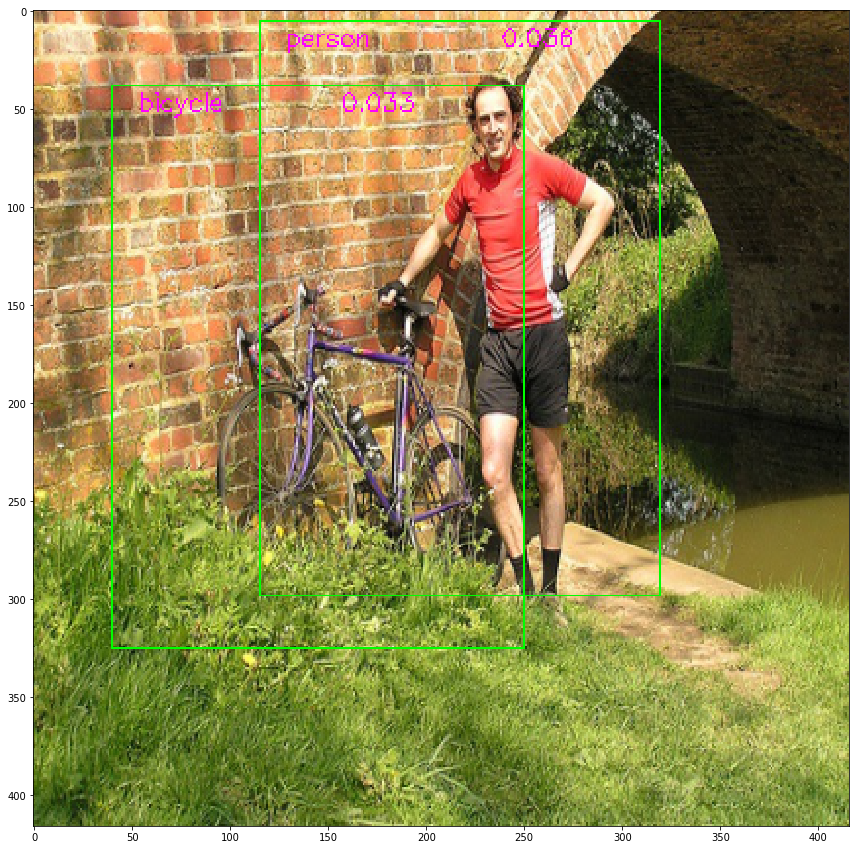

In [13]:
ima = draw_boxes(X_test[0],final_boxes,LABELS)
figsize = (15,15)
plt.figure(figsize=figsize)
plt.imshow(ima); 
plt.show()


# More examples 

In [14]:
np.random.seed(1)
Nsample   = 10
image_nms = list(np.random.choice(os.listdir(train_image_folder),Nsample))

person          0.088 xmin=  62,ymin= 101,xmax= 416,ymax= 416
sofa            0.049 xmin=  32,ymin= 100,xmax= 403,ymax= 416


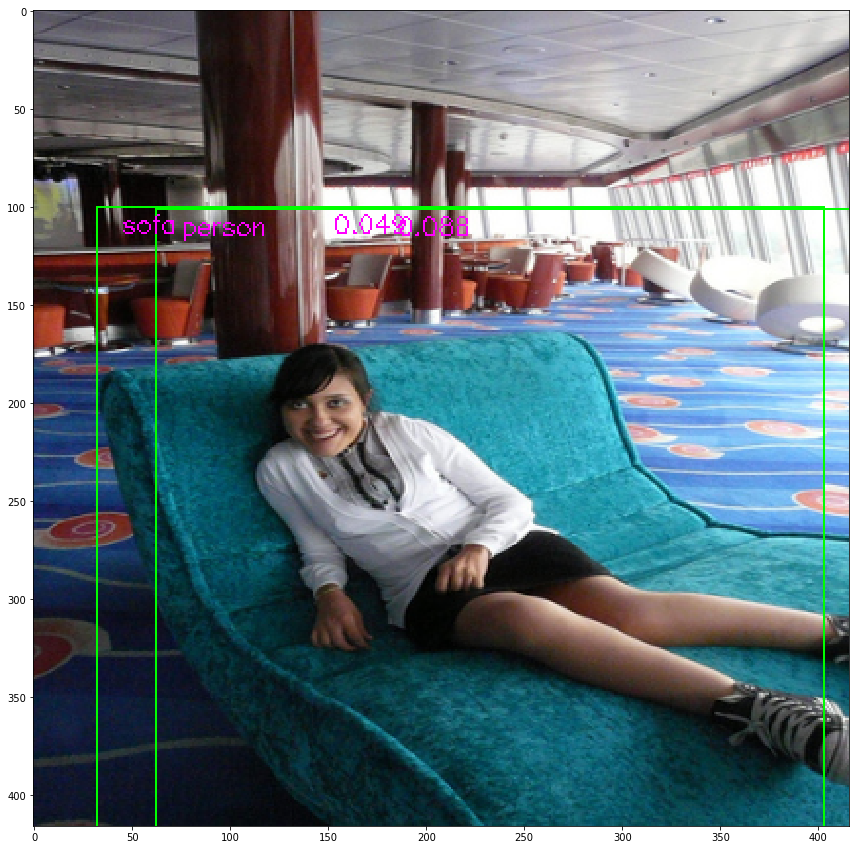

person          0.072 xmin=  22,ymin=   0,xmax= 395,ymax= 356


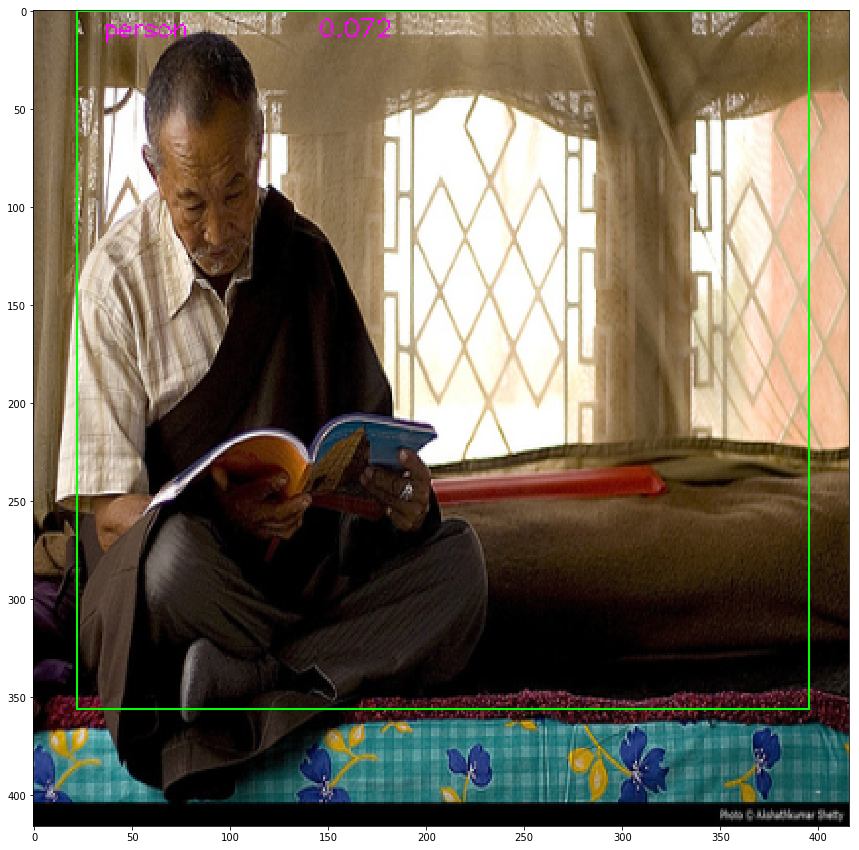

aeroplane       0.057 xmin= 131,ymin=   8,xmax= 345,ymax= 289
aeroplane       0.057 xmin= 131,ymin=   8,xmax= 345,ymax= 289
aeroplane       0.057 xmin= 131,ymin=   8,xmax= 345,ymax= 289


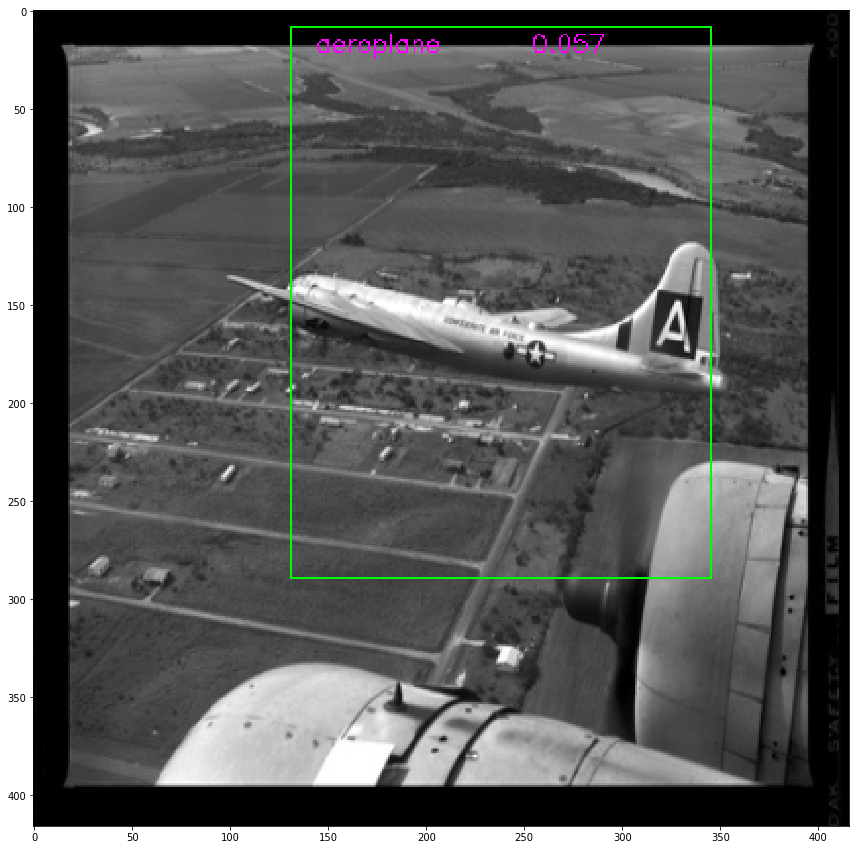

cat             0.149 xmin=  27,ymin=  61,xmax= 397,ymax= 416


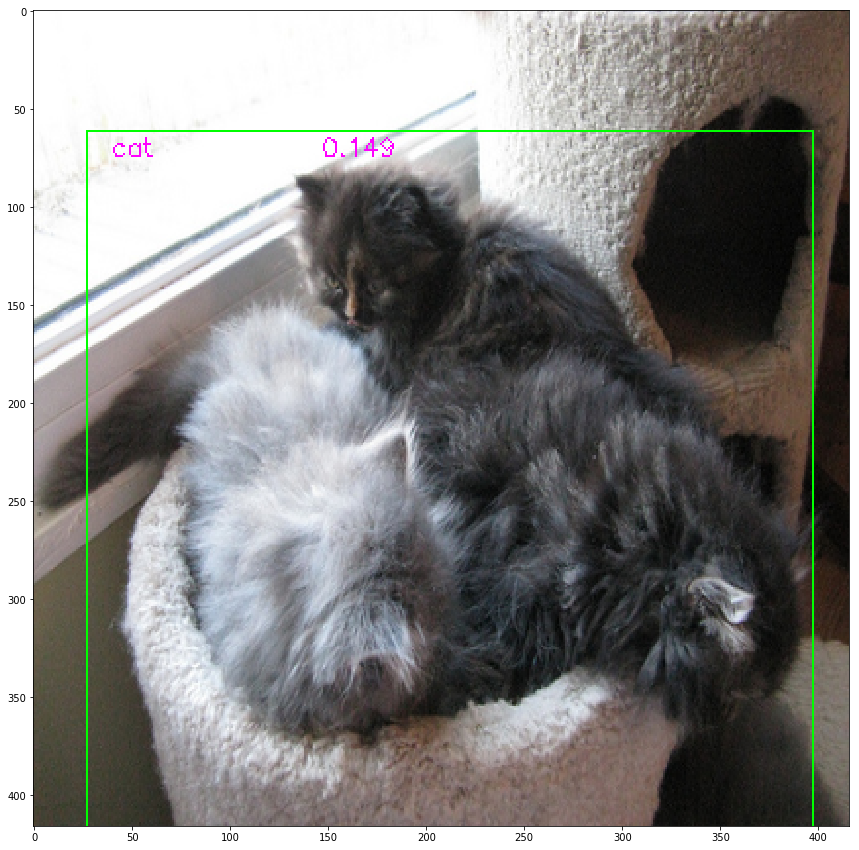

person          0.050 xmin=   0,ymin=  34,xmax= 331,ymax= 387


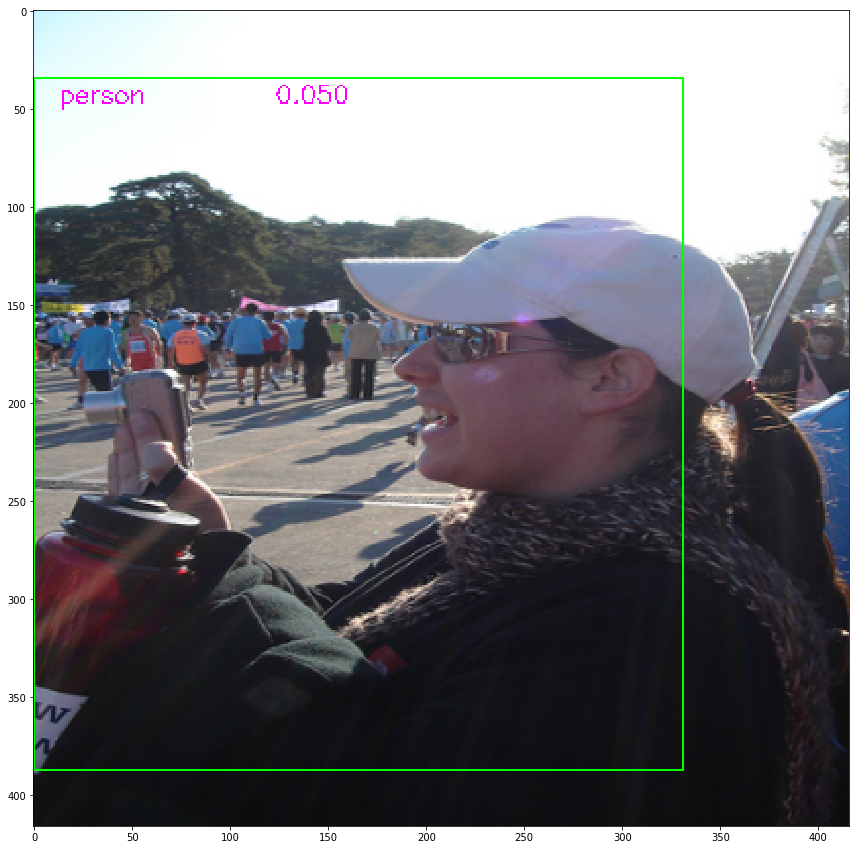

aeroplane       0.047 xmin=  23,ymin=   8,xmax= 392,ymax= 349


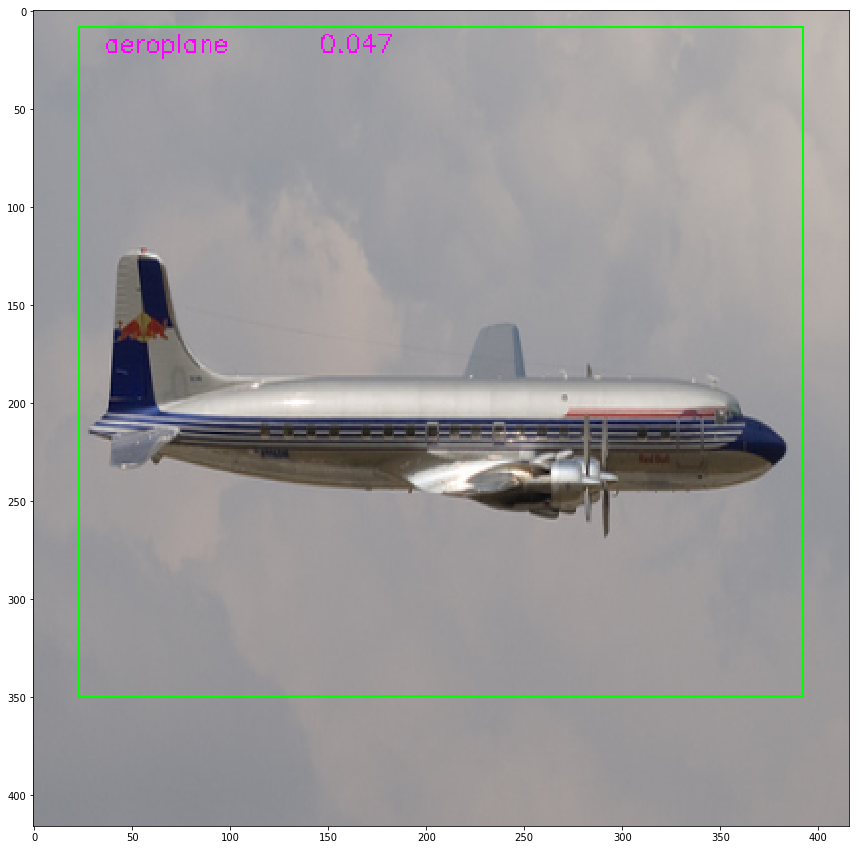

In [15]:
outputRescaler = OutputRescaler(ANCHORS=ANCHORS)
imageReader    = ImageReader(IMAGE_H,IMAGE_W=IMAGE_W, norm=lambda image : image / 255.)
X_test         = []
for img_nm in image_nms:
    _path    = os.path.join(train_image_folder,img_nm)
    out      = imageReader.fit(_path)
    X_test.append(out)

X_test = np.array(X_test)

## model
dummy_array    = np.zeros((len(X_test),1,1,1,TRUE_BOX_BUFFER,4))
y_pred         = model.predict([X_test,dummy_array])

for iframe in range(len(y_pred)):
        netout         = y_pred[iframe] 
        netout_scale   = outputRescaler.fit(netout)
        boxes          = find_high_class_probability_bbox(netout_scale,obj_threshold)
        if len(boxes) > 0:
            final_boxes    = nonmax_suppression(boxes,iou_threshold=iou_threshold)
            ima = draw_boxes(X_test[iframe],final_boxes,LABELS)
            plt.figure(figsize=figsize)
            plt.imshow(ima); 
            plt.show()